In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:
kmeans = pd.read_csv("k2.csv")

In [7]:
kmeans_features = kmeans.drop('target',axis = 1)
kmeans_target = kmeans['target']

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(kmeans_features, kmeans_target, test_size=0.30, random_state=42)

In [9]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,y_train2)
    pred_i = knn.predict(X_test2)
    error_rate.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Error Rate')

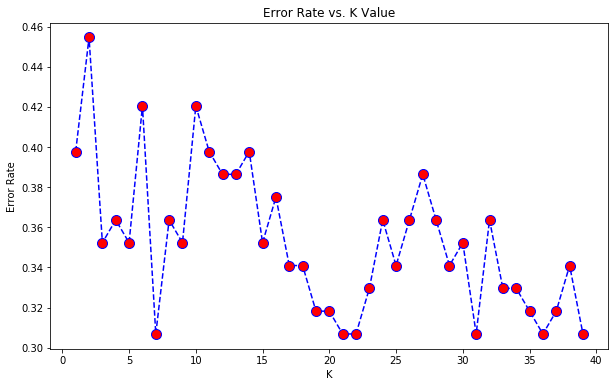

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
knneig = KNeighborsClassifier(n_neighbors=7)
knneig.fit(X_train2, y_train2)
pred_knneigh = knneig.predict(X_test2)
score_knneigh_before = accuracy_score(y_test2, pred_knneigh)
print("Score KNeighnors :",score_knneigh_before)
print(classification_report(y_test2, pred_knneigh))

Score KNeighnors : 0.6931818181818182
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        34
           1       0.76      0.72      0.74        54

    accuracy                           0.69        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.70      0.69      0.70        88



In [12]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train2, y_train2)
rfc_pred = rfc.predict(X_test2)
print(accuracy_score(y_test2,rfc_pred))
print(classification_report(y_test2,rfc_pred))

0.875
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.89      0.91      0.90        54

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.87      0.88      0.87        88



In [14]:
from sklearn.svm import SVC

In [15]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(probability = True, random_state = 42),param_grid,refit=True,verbose=3)
# May take awhile!
grid.fit(X_train2,y_train2)
grid_predictions = grid.predict(X_test2)
print(accuracy_score(y_test2,grid_predictions))
print(classification_report(y_test2,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.575, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.732, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.756, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.683, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.550, total=   0.0s
[CV] C

0.8068181818181818
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        34
           1       0.82      0.87      0.85        54

    accuracy                           0.81        88
   macro avg       0.80      0.79      0.79        88
weighted avg       0.81      0.81      0.80        88



[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.9s finished


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gauss_clf = GaussianNB()
gauss_clf.fit(X_train2, y_train2)
pred_gauss = gauss_clf.predict(X_test2)
print(accuracy_score(y_test2, pred_gauss))
print(classification_report(y_test2,pred_gauss))

0.8409090909090909
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        34
           1       0.83      0.93      0.88        54

    accuracy                           0.84        88
   macro avg       0.85      0.82      0.83        88
weighted avg       0.84      0.84      0.84        88



In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)
predictions = logmodel.predict(X_test2)
print(accuracy_score(y_test2, predictions))
print(classification_report(y_test2,predictions))

0.8522727272727273
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        34
           1       0.85      0.93      0.88        54

    accuracy                           0.85        88
   macro avg       0.85      0.83      0.84        88
weighted avg       0.85      0.85      0.85        88



C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [25]:
r_probs = [0 for _ in range(len(y_test2))]
KNN_probs = knneig.predict_proba(X_test2)
RF_probs = rfc.predict_proba(X_test2)
SVM_probs = grid.predict_proba(X_test2)
NB_probs = gauss_clf.predict_proba(X_test2)
LR_probs = logmodel.predict_proba(X_test2)

KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
SVM_probs = SVM_probs[:, 1]
LR_probs = LR_probs[:, 1]
NB_probs = NB_probs[:, 1]

r_auc = roc_auc_score(y_test2, r_probs)
KNN_auc = roc_auc_score(y_test2, KNN_probs)
RF_auc = roc_auc_score(y_test2, RF_probs)
SVM_auc = roc_auc_score(y_test2, SVM_probs)
LR_auc = roc_auc_score(y_test2, LR_probs)
NB_auc = roc_auc_score(y_test2, NB_probs)

r_fpr, r_tpr, _ = roc_curve(y_test2, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test2, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test2, RF_probs)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test2, SVM_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test2, LR_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test2, NB_probs)

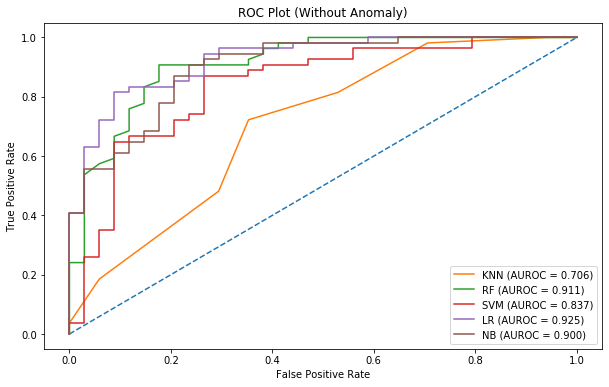

In [26]:
plt.figure(figsize=(10,6))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(SVM_fpr, SVM_tpr, label='SVM (AUROC = %0.3f)' % SVM_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(NB_fpr, NB_tpr, label='NB (AUROC = %0.3f)' % NB_auc)


# Title
plt.title('ROC Plot (Without Anomaly)')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()